## E2 Transitions in Barium-133 near 1762 nm

I follow the work of James App. Phys. B 66, 181-190 (1998) and Roos's Ph.D. thesis to determine the strength of the quadrupole transitions near 1762 nm.

Our two states of interest are defined as follows, with the primed states in the $D_{5/2}$ and unprimed in the $S_{1/2}$:

$\large \vert 1\rangle =  \vert\gamma,F',m_F'\rangle$

$\large \vert 2\rangle =  \vert\gamma,F,m_F\rangle$

To calculate the expression for an E2 transtion, we include the next term in the Taylor expansion of the electric field when calculating the interaction energy. The matrix element of the Hamiltonian becomes:

$\large H_{12} =  \frac{eE}{2\hbar}e^{-i\omega t}\langle 1 \vert (\vec{k}\cdot \vec{r})(\vec{r}\cdot\hat{\epsilon})\vert 2 \rangle$

or more explicitly:

$\large \large H_{12} =  \frac{eE}{2\hbar}e^{-i\omega t} \langle 1 \vert k(n_xr_x + n_yr_y + n_zr_z)(r_x\epsilon_x + r_y\epsilon_y + r_z\epsilon_z)\vert 2 \rangle$

with $\epsilon_i$ and $n_j$ unit vectors defining polarization and wave vector directions. 

The Rabi frequency is then given by:

$\large\Omega_0^{E2} = \left\vert\frac{eE\omega_{21}}{2\hbar c}\langle 1\vert \hat{r_i}\hat{r_j}\vert 2 \rangle \epsilon_i n_j\right\vert$

with the summation over $i,j$ implied, and $\large k = \frac{\omega_{21}}{c}$. James rexpresses the matrix elements in Racah tensor form:

$\large \langle 1 \vert r_ir_j\vert 2 \rangle \epsilon_in_j = \sum\limits_{q = -2}^{q = 2} \large \langle 1 \vert r^2C_q^2\vert 2 \rangle c_{i,j}^q \epsilon_i n_j $.

which can be simplified using the Wigner-Eckart theorem:

$\large \langle 1 \vert r_ir_j\vert 2 \rangle \epsilon_in_j = \langle 1 \vert\vert r^2C_q^2\vert\vert 2 \rangle \sum\limits_{q = -2}^{q = 2}\begin{pmatrix} F & 2 & F'\\ -m & q &m'\end{pmatrix}c_{i,j}^q \epsilon_i n_j $

We now need expressions for the geometric factors $g^{(q)} \equiv c^{(q)}_{ij}\epsilon_in_j$.
First, we would like to express $\epsilon_i,n_j$ in terms that are more lab friendly. Following Roos, we choose $\vec{B} = B_0(0,0,1)$, $\vec{k} = k(\sin\phi,0,\cos\phi)$, $\vec{\epsilon} =(\cos\gamma\cos\phi,\sin\gamma,-\cos\gamma\sin\phi)$.
For the k-vector, cylindrical symmetry allows freedom in choosing the plane of incidence. Roos chooses the x-z plane giving $k_y = 0$. The two k-vector components are then given by the angle $\phi$ between the k-vector and the magnetic field (see Figure below). The polarization components are given in terms of the angles $\gamma$ and $\phi$, where $\gamma$ is the angle between the plane of incidence (x-z) and the polarization vector when rotating about the k-vector.
<img src="E2_vectors.png">

$c_{i,j}^{(q)}$ is a second rank tensor, and apparently, calculated quite easily. James gives them explicitly at the end of his paper. Putting this all together we have:

$\large g^{(0)} = \frac{1}{2}\vert\cos\gamma\sin(2\phi)\vert$

$\large g^{(\pm1)} = \frac{1}{\sqrt{6}}\vert\cos\gamma\cos(2\phi) +i\sin\gamma\cos\phi \vert$

$\large g^{(\pm2)} = \frac{1}{\sqrt{6}}\vert\frac{1}{2}\cos\gamma\sin(2\phi) +i\sin\gamma\sin\phi\vert$

Next, the excited state linewidth is expressed in terms of the reduced matrix element, that we can then substitute above.
The partial linewidth, denoted $\overline{A}$, is given by:

$\large \overline{A}_{12}^{E2} = \frac{c\alpha k^5_{12}}{15} \vert\langle 1 \vert\vert r^2C_q^2\vert\vert 2 \rangle\vert^2 \sum\limits_{q = -2}^{q = 2}\begin{pmatrix} F & 2 & F'\\ -m & q &m'\end{pmatrix}^2$

with $\alpha$ the fine structure constant. The total decay rate is given by summing over all sublevels of $F$ the excited state can decay to:

$\large {A}_{12}^{E2} =  \sum\limits_{-F}^{F} \overline{A}_{12}^{E2} =  \frac{c\alpha k^5_{12}}{15(2F+1)} \vert\langle 1 \vert\vert r^2C_q^2\vert\vert 2 \rangle\vert^2$

With two expressions for the reduced matrix element, we can solve the Rabi frequency in terms of the dacay rate:

$\large\Omega_0 = \frac{e|E|}{\hbar}\sqrt{\frac{A_{12}}{c\alpha k^3_{12}}}\sigma$

with $\sigma$ given by:

$\large\sigma = \sqrt{\frac{15(2F+1)}{4}} \left \vert \sum\limits_{q=-2}^{q=2}\begin{pmatrix} F & 2 & F'\\ -m & q &m'\end{pmatrix}c_{i,j}^q \epsilon_i n_j \right\vert$

We also can replace the amplitude of the electric field with the laser intensity:

$\large\vert E\vert = \sqrt{\frac{2I}{\epsilon_0c}}$


In [39]:
### now actually calculate something.....
from sympy.physics.wigner import wigner_3j as wig
# D5/2 decay rate
A21 = 2*np.pi*5.e-3
q = 1.602e-19
e0 = 8.854e-12
c = 2.99792458e8 # ha guessed right
alpha = 7.297352e-3
lam = c/170.128e12
k = 2*np.pi/lam
hbar = 1.054e-34

# define intensity
# beam waist
w = (30.e-6)
# laser power
P = 5.0e-3
# intensity on axis
I = 2*P/np.pi/w**2

# define wave vector and b-field polarizations
# phi is the angle between laser wave vector and b-field direction
# gamma is angle between laser polarization and b-field direction

# for mF = 0 <-> mF' = 0 strongest transtion is given by (see Roos):
phi  = np.pi/4
gamma = 0

# Can't avoide driving delta mF = +/- 2 transitions

# Define uppler and lower states
# upper
FP = 3
mFP = 0

#lower
F = 1
mF = 0

# Rabi(FP, mFP, F, mF, phi, gamma, I)
def Rabi(FP,mFP, F, mF, phi, gamma, I):
    # first just do the prefactor with no 3j
    f = q/hbar*np.sqrt(2*I/c/e0)*sqrt(A21/c/alpha/k**3)*sqrt(15*(2*F+1)/4)
    
    # for each value of q, we need to sum over i,j for the geometric factor. 
    # c_i,j taken from James's paper
    # np.abs gives us the magnitude of a complex number
    # Below I don't use Roos's simplified epression. I calulate all terms and later I'll check this agains his
    
    # q = 0
    f2  = np.abs( 1./2*np.abs(np.cos(gamma)*np.sin(2*phi))*float(wig(F,2,FP,-mF, 0, mFP)) +  \
                # q = + 1    
                1./np.sqrt(6)*(-np.cos(gamma)*np.cos(2*phi) + 1j*np.sin(gamma)*np.cos(phi))* \
                float(wig(F,2,FP,-mF, 1, mFP)) + \
                  # q = - 1
                1./np.sqrt(6)*(np.cos(gamma)*np.cos(2*phi) + 1j*np.sin(gamma)*np.cos(phi))* \
                float(wig(F,2,FP,-mF, -1, mFP)) + \
                # q = 2
                1./np.sqrt(6)*(.5*np.cos(gamma)*np.sin(2*phi) - 1j*np.sin(gamma)*np.sin(phi))* \
                float(wig(F,2,FP,-mF, 2, mFP)) + \
                # q = -2
                1./np.sqrt(6)*(-.5*np.cos(gamma)*np.sin(2*phi) + 1j*np.sin(gamma)*np.sin(phi))* \
                float(wig(F,2,FP,-mF, -2, mFP)))                            
    return f*f2


def Rabi2(FP,mFP, F, mF, phi, gamma, I):
    # Uses Roos's simplified expression
    # first just do the prefactor with no 3j
    f = q/hbar*np.sqrt(2*I/c/e0)*sqrt(A21/c/alpha/k**3)*sqrt(15*(2*F+1)/4)
    
    f2  = np.abs( 1./2*np.abs(np.cos(gamma)*np.sin(2*phi))*float(wig(F,2,FP,-mF, 0, mFP)) +  \
                # q = +/- 1    
                1./np.sqrt(6)*np.abs(np.cos(gamma)*np.cos(2*phi) + 1j*np.sin(gamma)*np.cos(phi))* \
                 (float(wig(F,2,FP,-mF, -1, mFP)) + float(wig(F,2,FP,-mF, 1, mFP)) ) + \
                
                1./np.sqrt(6)*np.abs(.5*np.cos(gamma)*np.sin(2*phi) + 1j*np.sin(gamma)*np.sin(phi))* \
                 (float(wig(F,2,FP,-mF, -2, mFP)) + float(wig(F,2,FP,-mF, 2, mFP)))) 
    return f*f2


r = Rabi(FP, mFP, F, mF, phi, gamma,I)
r2 = Rabi2(FP, mFP, F, mF, phi, gamma,I)


print r/np.pi/2
print r2/np.pi/2


107907.8836990026
107907.8836990026


I think I believe our formula, so lets calculatd some stuff. What are the Rabi frequencies as a funtion of intensity for the clock-state transtions?

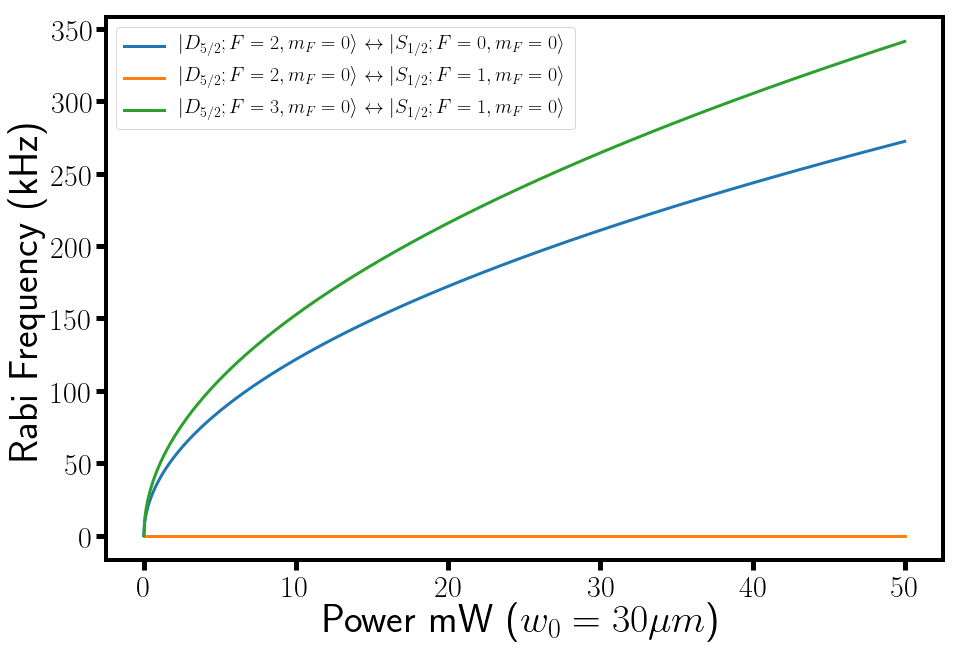

In [40]:
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 15, 10
P = np.linspace(0,50.e-3, 1000)
I = 2*P/np.pi/w**2

omega = np.zeros((3,len(P)))
# for mF = 0 <-> mF' = 0 strongest transtion is given by (see Roos):
phi  = np.pi/4
gamma = 0

# Rabi(FP, mFP, F, mF, phi, gamma, I)
omega[0,:] = Rabi(2, 0, 0, 0, phi, gamma,I)
omega[1,:] = Rabi(2, 0, 1, 0, phi, gamma,I)
omega[2,:] = Rabi(3, 0, 1, 0, phi, gamma,I)


plot(P*1e3, omega[0,:]/np.pi/2*1e-3, linewidth = 3, label = r'$\vert D_{5/2};F =2,m_F = 0\rangle\leftrightarrow\vert S_{1/2};F = 0,m_F = 0\rangle$')
plot(P*1e3, omega[1,:]/np.pi/2*1e-3, linewidth = 3, label = r'$\vert D_{5/2};F =2,m_F = 0\rangle\leftrightarrow\vert S_{1/2};F = 1,m_F = 0\rangle$')
plot(P*1e3, omega[2,:]/np.pi/2*1e-3, linewidth = 3, label = r'$\vert D_{5/2};F =3,m_F = 0\rangle\leftrightarrow\vert S_{1/2};F = 1,m_F = 0\rangle$')

legend(fontsize = 20)
xlabel(r'Power mW ($w_0  = 30 \mu m$)', fontsize = 40)
ylabel('Rabi Frequency (kHz)', fontsize = 40)
tick_params(labelsize = 30)
tick_params(width=5, length=10)
show()

When the polarization is optimized to drive $\Delta m_F = 0$, the $\Delta m_F = \pm 2$ transitions are allowed. Plot the relative rabi frequencies.

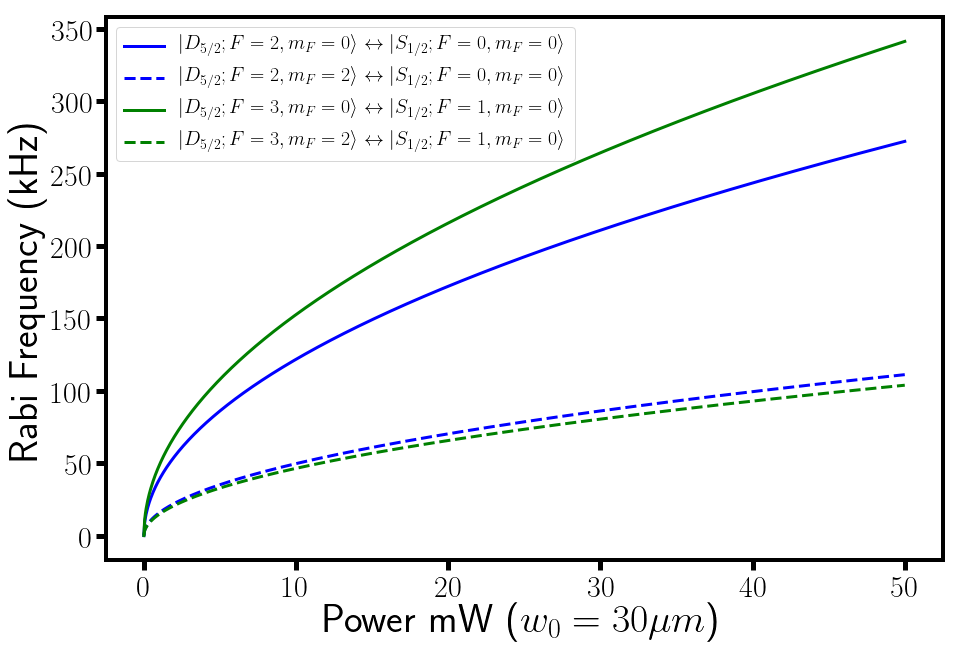

In [41]:
### What's the strength of the delta m = +/- 2 when driving clock transitions

rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 15, 10
P = np.linspace(0,50.e-3, 1000)
I = 2*P/np.pi/w**2

omega = np.zeros((4,len(P)))
# for mF = 0 <-> mF' = 0 strongest transtion is given by (see Roos):
phi  = np.pi/4
gamma = 0

# Rabi(FP, mFP, F, mF, phi, gamma, I)
omega[0,:] = Rabi(2, 0, 0, 0, phi, gamma,I)
omega[1,:] = Rabi(2, 2, 0, 0, phi, gamma,I)
omega[2,:] = Rabi(3, 0, 1, 0, phi, gamma,I)
omega[3,:] = Rabi(3, 2, 1, 0, phi, gamma,I)


plot(P*1e3, omega[0,:]/np.pi/2*1e-3, color = 'b', linewidth = 3, label = r'$\vert D_{5/2};F =2,m_F = 0\rangle\leftrightarrow\vert S_{1/2};F = 0,m_F = 0\rangle$')
plot(P*1e3, omega[1,:]/np.pi/2*1e-3,'--', color = 'b', linewidth = 3, label = r'$\vert D_{5/2};F =2,m_F = 2\rangle\leftrightarrow\vert S_{1/2};F = 0,m_F = 0\rangle$')
plot(P*1e3, omega[2,:]/np.pi/2*1e-3, color = 'g', linewidth = 3, label = r'$\vert D_{5/2};F =3,m_F = 0\rangle\leftrightarrow\vert S_{1/2};F = 1,m_F = 0\rangle$')
plot(P*1e3, omega[3,:]/np.pi/2*1e-3, '--', color = 'g',  linewidth = 3, label = r'$\vert D_{5/2};F =3,m_F = 2\rangle\leftrightarrow\vert S_{1/2};F = 1,m_F = 0\rangle$')

legend(fontsize = 20)
xlabel(r'Power mW ($w_0  = 30 \mu m$)', fontsize = 40)
ylabel('Rabi Frequency (kHz)', fontsize = 40)
tick_params(labelsize = 30)
tick_params(width=5, length=10)
show()


That might be bad. To get an estimate, what's the population transfer from the $m_F = 0 \rightarrow m_{F'} = 2$ when tuned to the clock state transtion, using a pulse duration for clock-state pi-pulse, but assuming the clock state is not driven, i.e a two-level system between the $m_F = 0 \rightarrow m_{F'} = 2$ with the laser detuned.
<img src="two_level_estimates.png">

c:\python27\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in divide
c:\python27\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in divide
c:\python27\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sin
c:\python27\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sin


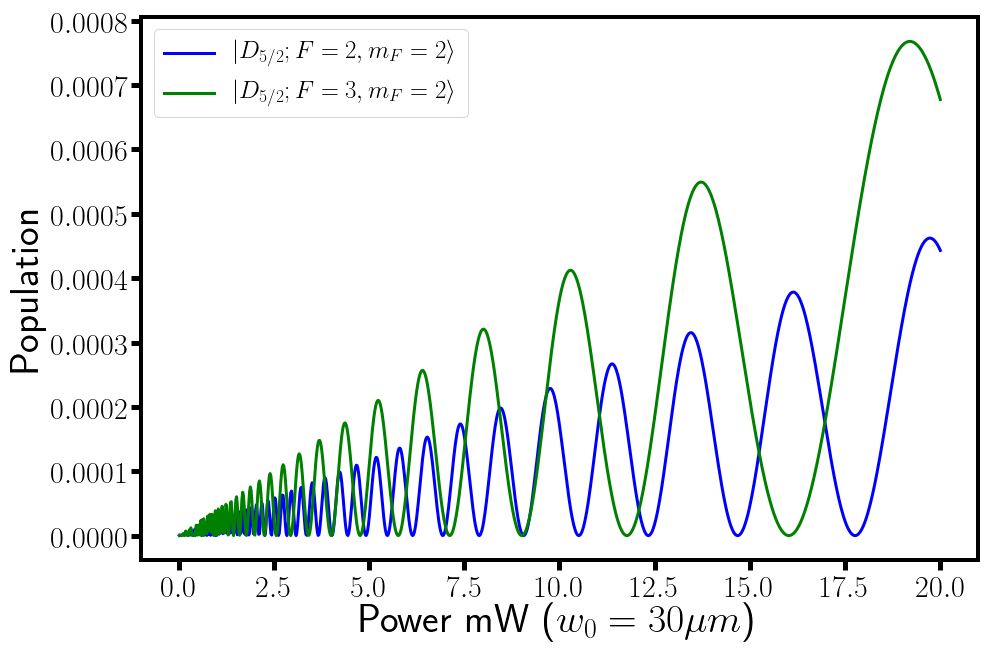

In [43]:
P = np.linspace(0,20.e-3, 1000)
I = 2*P/np.pi/w**2
B = 5.2 # Gauss, experiment magnetic field strength

# detuning from linear zeeman shift. We know g_F = 1 for F' = 3 and g_F = 1.4 for F' = 2, so E = g_F*delta_mF*1.4MHz/G*B
delta_22_00 = 1.4*2*1.4*B*1e6
delta_32_10 =  1.0*2*1.4*B*1e6


# calculate the Rabi frequencies at a given power, notation omega_FP,mFP_F,mF
# Rabi(FP, mFP, F, mF, phi, gamma, I)
omega_20_00 = Rabi(2, 0, 0, 0, phi, gamma,I) 
omega_22_00 = Rabi(2, 2, 0, 0, phi, gamma,I) 
omega_30_10 = Rabi(3, 0, 1, 0, phi, gamma,I) 
omega_32_10 = Rabi(3, 2, 1, 0, phi, gamma,I) 

'''
print delta_22_00
print delta_32_10
print omega_20_00
print omega_22_00
print omega_30_10
print omega_32_10
'''

# get the pi time for the clock state and use that
t_pi_20_00 = np.pi/omega_20_00
t_pi_30_10 = np.pi/omega_30_10

P_22_00 = omega_22_00**2/(omega_22_00**2 + delta_22_00**2)*np.sin(np.sqrt(omega_22_00**2 + delta_22_00**2)*t_pi_20_00/2)**2
P_32_10 = omega_32_10**2/(omega_32_10**2 + delta_32_10**2)*np.sin(np.sqrt(omega_32_10**2 + delta_32_10**2)*t_pi_30_10/2)**2

#print r'F = 2, m_F = 2 Population :', '{:.3e}'.format(P_22_00)
#print r'F = 3, m_F = 2 Population :', '{:.3e}'.format(P_32_10)

plot(P*1e3, P_22_00, color = 'b', linewidth = 3, label = r'$\vert D_{5/2};F =2,m_F = 2\rangle$')
plot(P*1e3, P_32_10, color = 'g',  linewidth = 3, label = r'$\vert D_{5/2};F =3,m_F = 2\rangle$')

legend(fontsize = 25)
xlabel(r'Power mW ($w_0  = 30 \mu m$)', fontsize = 40)
ylabel('Population', fontsize = 40)
tick_params(labelsize = 30)
tick_params(width=5, length=10)
show()


### 2-Photon Raman Rabi Frequency


We start by just plotting the two photon rabi frequency for the simple three-level system:

$$\large \Omega_{\mathrm{R}} = \frac{ \Omega_\mathrm{R1}  \Omega_\mathrm{R2} } {2\Delta}$$

with  $\Omega_\mathrm{R1}$ and $\Omega_\mathrm{R2}$ the two single photon Rabi frequencies.

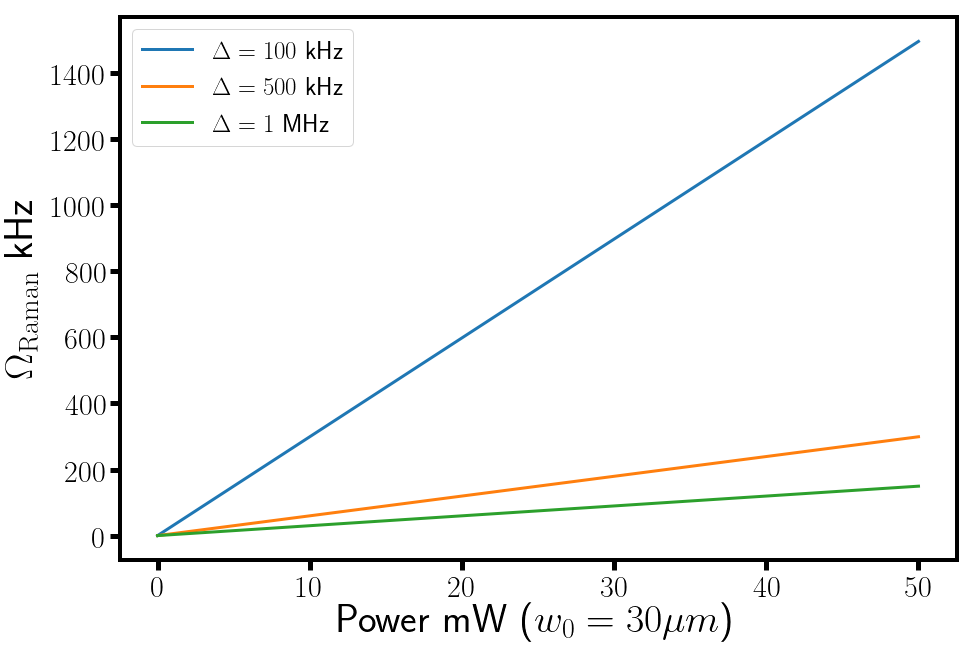

In [44]:
## Few definitions
# beam waist
w = (30.e-6)
P = np.linspace(0,25.e-3, 1000)

# Here we are assuming each beam has this much power
I = 2*P/np.pi/w**2

# I think a detuning this small invalidates assumptions in deriving the two-photon Rabi frequency
delta1 = 2*np.pi*100.e3
delta2 = 2*np.pi*500.e3
delta3 = 2*np.pi*1.e6

# Calculate single photon Rabi frequency

# for mF = 0 <-> mF' = 1 strongest transtion is given by (see Roos):
phi  = 0
gamma = 0

# lower
FP = 1
mFP = 1

# uppter
F = 3
mF = 0

# Rabi(FP, mFP, F, mF, phi, gamma, I)
omega1  = Rabi(FP, mFP, F, mF, phi, gamma,I) 

# lower
FP = 1
mFP = 1

# upper
F = 2
mF = 0

omega2  = Rabi(FP, mFP, F, mF, phi, gamma,I) 


OR1 = omega1*omega2/2/delta1
OR2 = omega1*omega2/2/delta2
OR3 = omega1*omega2/2/delta3

# remember we used P for each beam, so the total power is twice as much
plot(2*P*1e3, OR1*1e-3, linewidth = 3, label = r'$\Delta = 100$ kHz')
plot(2*P*1e3, OR2*1e-3, linewidth = 3, label = r'$\Delta = 500$ kHz')
plot(2*P*1e3, OR3*1e-3, linewidth = 3, label = r'$\Delta = 1$ MHz')

legend(fontsize = 25)
xlabel(r'Power mW ($w_0  = 30 \mu m$)', fontsize = 40)
ylabel(r'$\Omega_{\mathrm{Raman}}$ kHz', fontsize = 40)
tick_params(labelsize = 30)
tick_params(width=5, length=10)
show()


## Summary

1. The $\vert D_{5/2};F =2,m_F = 0\rangle \not\leftrightarrow \vert S_{1/2};F = 1,m_F = 0\rangle$ tranistion is forbidden by angular momentum selection rules. This is pretty cool,   because it means you can drive either of the allowed $m_{F'} = 0 \leftrightarrow m_F = 0$ transtion without mixing.

2. When maximizing the  $m_{F'} = 0 \leftrightarrow m_F = 0$ transition strength, you're a stuck driving $\Delta m_F \pm 2$ transitions. However, you can tune the power such that a pi-pulse for the clock state is a two-pi-pulse for the off-resonant transtion.